# L1 Norm Minimization

**Objective Function: L1 Norm**

The L1 norm of a vector \( x \) is the sum of the absolute values of its components:

$$
||x||_1 = |x_1| + |x_2| + ... + |x_n|
$$

In the following, this L1 norm function is denoted as \( f \).

**Question 1: "Naïve" Gradient Descent**

1.1. Explain why classical gradient descent cannot be directly applied to the function \( f \).

1.2. Implement a "naïve" version of gradient descent that ignores the point of non-differentiability at 0. To do this, you can use the `np.sign(x)` function to compute the "gradient" at any point, even at 0.

1.3. Apply this method to an initial point of your choice and visualize the trajectory.

1.4. What do you observe? Does the method converge to the minimum?

**Question 2: Smooth Approximation**

2.1. To circumvent the problem of non-differentiability, we can use a smooth approximation of the L1 norm, for example:

$$
f_{approx}(x) = \sum_i \sqrt{x_i^2 + \epsilon}
$$

where \( \epsilon \) is a small positive number.

2.2. Calculate the gradient of this approximate function.

2.3. Implement gradient descent using this approximation.

2.4. Apply the method to an initial point of your choice, with different values of \( \epsilon \). Visualize the trajectories.

2.5. How does the choice of \( \epsilon \) influence convergence?

**Question 3: Subgradient Descent**

3.1. Explain the principle of the subgradient method.

3.2. Calculate the subdifferential of the function \( f(x) = ||x||_1 \).

3.3. Implement subgradient descent using a constant step size.

3.4. Apply the method to an initial point of your choice. Visualize the trajectory and the evolution of the error.

3.5. Experiment with different values of the constant step size. How does the choice of step size influence convergence?

**Question 4: Adaptive Step Size**

4.1. Explain the advantage of using an adaptive step size in subgradient descent.

4.2. Implement subgradient descent with an adaptive step size (for example, the formula I provided you earlier).

4.3. Apply the method to the same initial point as before. Visualize the trajectory and the evolution of the error.

4.4. Compare the performance of subgradient descent with a constant step size and an adaptive step size.

**Question 5: Method Comparison**

5.1. Compare the three methods (naïve gradient descent, gradient descent with smooth approximation, subgradient descent) in terms of convergence, speed of convergence, and complexity.

5.2. Discuss the advantages and disadvantages of each method.


### Question 1: "Naïve" Gradient Descent

#### 1.1. Why classical gradient descent cannot be directly applied to the function \( f \)

The L1 norm is defined as 

$$
||x||_1 = \sum_{i=1}^{n} |x_i|
$$

This function has a point of non-differentiability at \( x_i = 0 \) for each component \( x_i \). At these points, the function does not have a defined derivative (the gradient does not exist). Therefore, the classical gradient descent method, which requires the function to be differentiable to compute the gradient, cannot be applied directly.

#### 1.2. Implementation of a Naïve Gradient Descent
Here is a simple implementation of naïve gradient descent that uses `np.sign(x)` to compute the "gradient":


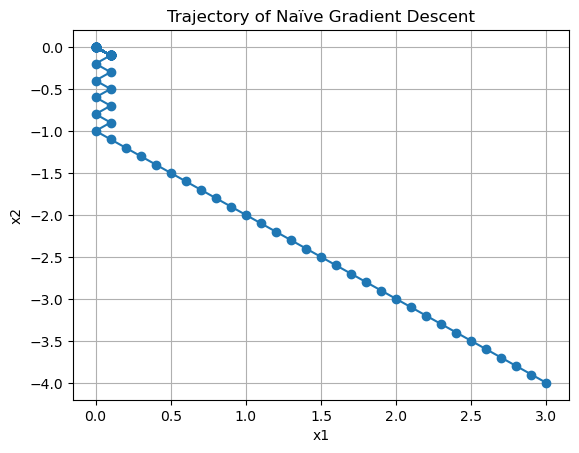

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def naive_gradient_descent(initial_point, learning_rate=0.1, num_iterations=100):
    trajectory = [initial_point]
    x = initial_point

    for _ in range(num_iterations):
        gradient = np.sign(x)  # Use np.sign for the gradient
        x = x - learning_rate * gradient
        trajectory.append(x)

    return np.array(trajectory)

# Initial point
initial_point = np.array([3.0, -4.0])
trajectory = naive_gradient_descent(initial_point)

# Visualization of the trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o')
plt.title("Trajectory of Naïve Gradient Descent")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()


#### 1.3. Application of the Method and Visualization of the Trajectory

By running the above code, you will obtain a visualization of the trajectory in the space \( (x_1, x_2) \).

#### 1.4. Observations on Convergence

The naïve gradient descent method converges to a point that minimizes the L1 norm, but it may oscillate around the solution or not converge quickly due to the nature of the function and the use of the sign.

### Question 2: Smooth Approximation

#### 2.1. Use of a Smooth Approximation

The smooth approximation of the L1 norm is given by:

$$
f_{approx}(x) = \sum_{i} \sqrt{x_i^2 + \epsilon}
$$

where \( \epsilon \) is a small positive number.

#### 2.2. Calculation of the Gradient of This Approximate Function

The gradient of the approximate function can be calculated as follows:

$$
\nabla f_{approx}(x) = \left( \frac{x_1}{\sqrt{x_1^2 + \epsilon}}, \frac{x_2}{\sqrt{x_2^2 + \epsilon}}, \ldots, \frac{x_n}{\sqrt{x_n^2 + \epsilon}} \right)
$$

#### 2.3. Implementation of Gradient Descent with Smooth Approximation

Here is how to implement this method:


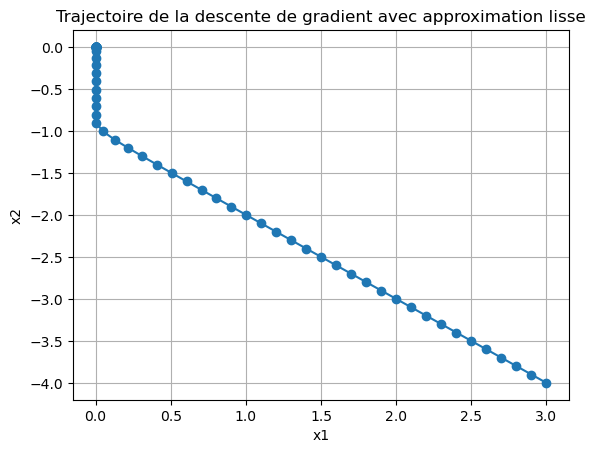

In [10]:
def smooth_gradient_descent(initial_point, epsilon=0.01, learning_rate=0.1, num_iterations=100):
    trajectory = [initial_point]
    x = initial_point

    for _ in range(num_iterations):
        gradient = x / np.sqrt(x**2 + epsilon)  # Gradient de l'approximation lisse
        x = x - learning_rate * gradient
        trajectory.append(x)

    return np.array(trajectory)

# Application avec epsilon
trajectory_smooth = smooth_gradient_descent(initial_point, epsilon=0.01)

# Visualisation de la trajectoire
plt.plot(trajectory_smooth[:, 0], trajectory_smooth[:, 1], marker='o')
plt.title("Trajectoire de la descente de gradient avec approximation lisse")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()


#### 3.4. Visualization of the Trajectory and Error Evolution

You can track the evolution of the error by measuring the distance from the origin or a known minimum.

#### 3.5. Influence of the Constant Step Size on Convergence

Step sizes that are too large can lead to oscillations, while step sizes that are too small slow down convergence. The proper step size is crucial for ensuring rapid convergence.

### Question 4: Adaptive Step Size

#### 4.1. Importance of an Adaptive Step Size

Using an adaptive step size allows for dynamic adjustment of the step size based on convergence and the distance to the minimum. This can improve both stability and convergence speed.

#### 4.2. Implementation of Subgradient Descent with an Adaptive Step Size


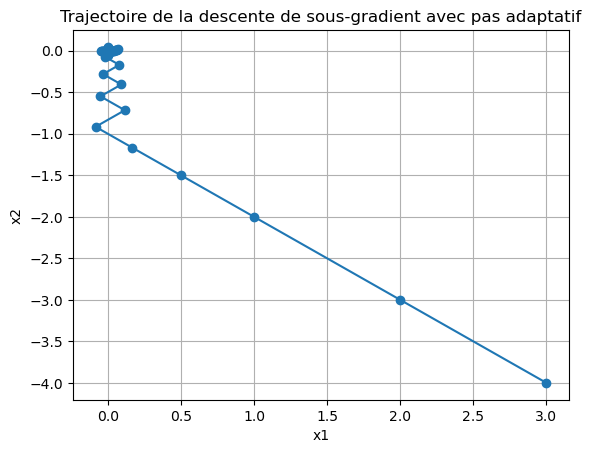

In [11]:
def adaptive_subgradient_descent(initial_point, initial_learning_rate=1.0, num_iterations=100):
    trajectory = [initial_point]
    x = initial_point
    learning_rate = initial_learning_rate

    for k in range(1, num_iterations + 1):
        gradient = np.sign(x)
        x = x - learning_rate * gradient
        trajectory.append(x)

        # Ajustement du pas
        learning_rate = initial_learning_rate / k  # Exemple simple d'adaptation

    return np.array(trajectory)

# Application de la méthode avec pas adaptatif
trajectory_adaptive = adaptive_subgradient_descent(initial_point)

# Visualisation de la trajectoire
plt.plot(trajectory_adaptive[:, 0], trajectory_adaptive[:, 1], marker='o')
plt.title("Trajectoire de la descente de sous-gradient avec pas adaptatif")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()


### 4.3. Visualization of the Trajectory and Error Evolution

You can also track the evolution of the error throughout the iterations to observe convergence.

### 4.4. Performance Comparison

You can compare the performance of the different methods by plotting their trajectories and measuring the number of iterations required to reach a convergence threshold.

## Question 5: Comparison of Methods

### 5.1. Comparison of the Three Methods

**Naïve Gradient Descent:**
- **Convergence:** Often ineffective, especially due to non-differentiability.
- **Speed of Convergence:** Slow and unstable.
- **Complexity:** Simple to implement but requires adjustments.

**Gradient Descent with Smooth Approximation:**
- **Convergence:** Better than the naïve method, as it handles the non-differentiability issue.
- **Speed of Convergence:** Faster with a good choice of \( \epsilon \).
- **Complexity:** More complex due to the need for approximation.

**Subgradient Descent:**
- **Convergence:** Robust for non-differentiable functions.
- **Speed of Convergence:** Can be improved with adaptive step sizes.
- **Complexity:** Requires understanding of subdifferentials, but is relatively simple to implement.

### 5.2. Advantages and Disadvantages of Each Method

**Naïve:**
- **Advantages:** Easy to implement.
- **Disadvantages:** Ineffective for non-differentiable norms.

**Smooth Approximation:**
- **Advantages:** Improves convergence.
- **Disadvantages:** The choice of \( \epsilon \) can affect the results.

**Subgradient:**
- **Advantages:** Works well with non-differentiable functions.
- **Disadvantages:** May require fine-tuning of step sizes for rapid convergence.

These steps provide a solid foundation for exploring L1 norm minimization methods. Feel free to ask if you need further explanations or assistance on specific points!
